In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score


In [26]:
df = pd.read_csv(r"C:\Users\USER\Desktop\Data analysis\ML project\images\icml_face_data.csv")
print(df.shape)
df.iloc[:,:]

(35887, 3)


,emotion,Usage,pixels
0,0,Training,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,Training,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,Training,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,Training,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,Training,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...
...,...,...,...
35882,6,PrivateTest,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...
35883,3,PrivateTest,178 174 172 173 181 188 191 194 196 199 200 20...
35884,0,PrivateTest,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...
35885,3,PrivateTest,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...


In [27]:
df.isnull().sum()

emotion    0
 Usage     0
 pixels    0
dtype: int64

In [28]:
df.columns = df.columns.str.strip()

In [29]:
df['pixels']

0        70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1        151 150 147 155 148 133 111 140 170 174 182 15...
2        231 212 156 164 174 138 161 173 182 200 106 38...
3        24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4        4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...
                               ...                        
35882    50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...
35883    178 174 172 173 181 188 191 194 196 199 200 20...
35884    17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...
35885    30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...
35886    19 13 14 12 13 16 21 33 50 57 71 84 97 108 122...
Name: pixels, Length: 35887, dtype: object

In [30]:
df['pixels'] = df['pixels'].map(lambda x: list(map(int, x.split())))
pix = pd.DataFrame(df['pixels'].to_list())
ranum_pixels = len(pix.columns)
racolumns_names = [f"{i}" for i in range(ranum_pixels)]
pix.columns = racolumns_names

In [31]:
pix

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
0,70,80,82,72,58,58,60,63,54,58,...,159,182,183,136,106,116,95,106,109,82
1,151,150,147,155,148,133,111,140,170,174,...,105,108,95,108,102,67,171,193,183,184
2,231,212,156,164,174,138,161,173,182,200,...,104,138,152,122,114,101,97,88,110,152
3,24,32,36,30,32,23,19,20,30,41,...,174,126,132,132,133,136,139,142,143,142
4,4,0,0,0,0,0,0,0,0,0,...,12,34,31,31,31,27,31,30,29,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35882,50,36,17,22,23,29,33,39,34,37,...,216,215,216,217,221,222,220,223,221,216
35883,178,174,172,173,181,188,191,194,196,199,...,147,141,136,118,66,7,0,0,0,0
35884,17,17,16,23,28,22,19,17,25,26,...,190,179,193,193,194,170,148,154,133,113
35885,30,28,28,29,31,30,42,68,79,81,...,30,27,27,26,28,35,35,35,30,28


In [32]:
checktrainstop = df[df['Usage']=='Training']
checktrainstop

,emotion,Usage,pixels
0,0,Training,"[70, 80, 82, 72, 58, 58, 60, 63, 54, 58, 60, 4..."
1,0,Training,"[151, 150, 147, 155, 148, 133, 111, 140, 170, ..."
2,2,Training,"[231, 212, 156, 164, 174, 138, 161, 173, 182, ..."
3,4,Training,"[24, 32, 36, 30, 32, 23, 19, 20, 30, 41, 21, 2..."
4,6,Training,"[4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 15, 23..."
...,...,...,...
28704,2,Training,"[84, 85, 85, 85, 85, 85, 85, 85, 86, 86, 86, 8..."
28705,0,Training,"[114, 112, 113, 113, 111, 111, 112, 113, 115, ..."
28706,4,Training,"[74, 81, 87, 89, 95, 100, 98, 93, 105, 120, 12..."
28707,0,Training,"[222, 227, 203, 90, 86, 90, 84, 77, 94, 87, 99..."


In [33]:
trainsubset = df.iloc[:28709]
subset1 = trainsubset[trainsubset['Usage']!='Training']
testsubset = df.iloc[28709:]
subset2 = testsubset[testsubset['Usage']=='Training']
subset1,subset2

(Empty DataFrame
 Columns: [emotion, Usage, pixels]
 Index: [],
 Empty DataFrame
 Columns: [emotion, Usage, pixels]
 Index: [])

In [34]:
df2 = pd.concat([df, pix], axis=1)
df2

,emotion,Usage,pixels,0,1,2,3,4,5,6,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
0,0,Training,"[70, 80, 82, 72, 58, 58, 60, 63, 54, 58, 60, 4...",70,80,82,72,58,58,60,...,159,182,183,136,106,116,95,106,109,82
1,0,Training,"[151, 150, 147, 155, 148, 133, 111, 140, 170, ...",151,150,147,155,148,133,111,...,105,108,95,108,102,67,171,193,183,184
2,2,Training,"[231, 212, 156, 164, 174, 138, 161, 173, 182, ...",231,212,156,164,174,138,161,...,104,138,152,122,114,101,97,88,110,152
3,4,Training,"[24, 32, 36, 30, 32, 23, 19, 20, 30, 41, 21, 2...",24,32,36,30,32,23,19,...,174,126,132,132,133,136,139,142,143,142
4,6,Training,"[4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 15, 23...",4,0,0,0,0,0,0,...,12,34,31,31,31,27,31,30,29,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35882,6,PrivateTest,"[50, 36, 17, 22, 23, 29, 33, 39, 34, 37, 37, 3...",50,36,17,22,23,29,33,...,216,215,216,217,221,222,220,223,221,216
35883,3,PrivateTest,"[178, 174, 172, 173, 181, 188, 191, 194, 196, ...",178,174,172,173,181,188,191,...,147,141,136,118,66,7,0,0,0,0
35884,0,PrivateTest,"[17, 17, 16, 23, 28, 22, 19, 17, 25, 26, 20, 2...",17,17,16,23,28,22,19,...,190,179,193,193,194,170,148,154,133,113
35885,3,PrivateTest,"[30, 28, 28, 29, 31, 30, 42, 68, 79, 81, 77, 6...",30,28,28,29,31,30,42,...,30,27,27,26,28,35,35,35,30,28


In [35]:
df2.drop('pixels', axis=1, inplace=True)
df2

,emotion,Usage,0,1,2,3,4,5,6,7,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
0,0,Training,70,80,82,72,58,58,60,63,...,159,182,183,136,106,116,95,106,109,82
1,0,Training,151,150,147,155,148,133,111,140,...,105,108,95,108,102,67,171,193,183,184
2,2,Training,231,212,156,164,174,138,161,173,...,104,138,152,122,114,101,97,88,110,152
3,4,Training,24,32,36,30,32,23,19,20,...,174,126,132,132,133,136,139,142,143,142
4,6,Training,4,0,0,0,0,0,0,0,...,12,34,31,31,31,27,31,30,29,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35882,6,PrivateTest,50,36,17,22,23,29,33,39,...,216,215,216,217,221,222,220,223,221,216
35883,3,PrivateTest,178,174,172,173,181,188,191,194,...,147,141,136,118,66,7,0,0,0,0
35884,0,PrivateTest,17,17,16,23,28,22,19,17,...,190,179,193,193,194,170,148,154,133,113
35885,3,PrivateTest,30,28,28,29,31,30,42,68,...,30,27,27,26,28,35,35,35,30,28


In [36]:
def checkifthereisnull(data):
  if data.isnull().values.any():
    return True
  else:
    return False
checkifthereisnull(df2)

False

In [37]:
df2.isnull().sum()

emotion    0
Usage      0
0          0
1          0
2          0
          ..
2299       0
2300       0
2301       0
2302       0
2303       0
Length: 2306, dtype: int64

In [38]:
filtereddf = df2[df2['emotion'].isin([0,2,4,5,6])]

In [39]:
knnY = filtereddf["emotion"]
knnX= filtereddf.drop(['emotion','Usage'], axis=1)

In [40]:
knnY

0        0
1        0
2        2
3        4
4        6
        ..
35880    2
35881    0
35882    6
35884    0
35886    2
Name: emotion, Length: 26351, dtype: int64

In [41]:
knnX

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
0,70,80,82,72,58,58,60,63,54,58,...,159,182,183,136,106,116,95,106,109,82
1,151,150,147,155,148,133,111,140,170,174,...,105,108,95,108,102,67,171,193,183,184
2,231,212,156,164,174,138,161,173,182,200,...,104,138,152,122,114,101,97,88,110,152
3,24,32,36,30,32,23,19,20,30,41,...,174,126,132,132,133,136,139,142,143,142
4,4,0,0,0,0,0,0,0,0,0,...,12,34,31,31,31,27,31,30,29,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35880,164,172,175,171,172,173,178,181,188,192,...,217,215,214,216,218,217,222,223,227,231
35881,181,177,176,156,178,144,136,132,122,107,...,133,155,156,107,31,53,74,60,28,55
35882,50,36,17,22,23,29,33,39,34,37,...,216,215,216,217,221,222,220,223,221,216
35884,17,17,16,23,28,22,19,17,25,26,...,190,179,193,193,194,170,148,154,133,113


C:\Users\USER\AppData\Local\Temp\ipykernel_11024\3291147276.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=knnY, palette="icefire")


emotion
6    6198
4    6077
2    5121
0    4953
5    4002
Name: count, dtype: int64

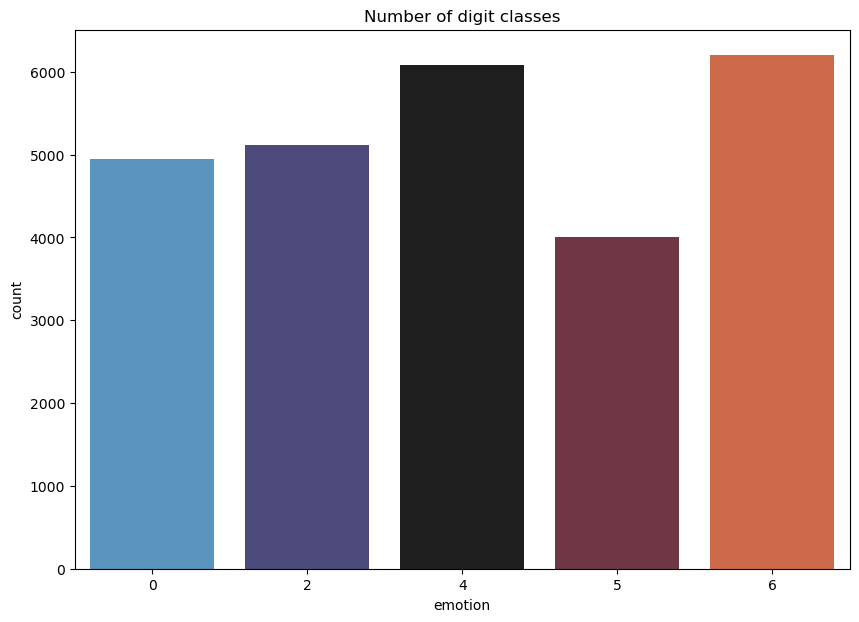

In [42]:
plt.figure(figsize=(10,7))
sns.countplot(x=knnY, palette="icefire")
plt.title("Number of digit classes")
knnY.value_counts()

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(knnX, knnY, test_size=0.2, random_state=5)

In [44]:
X_train = X_train / 255
X_test = X_test / 255

In [45]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [46]:
Y_pred = knn.predict(X_test)

In [47]:
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {(accuracy * 100):.2f}%")

Accuracy: 37.36%


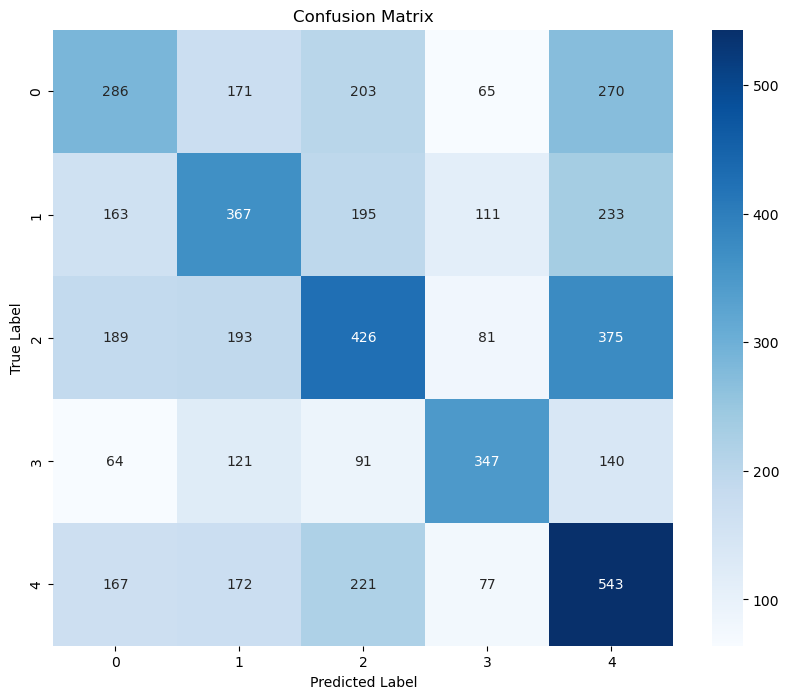

In [48]:
cm = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(5), yticklabels=range(5))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [49]:
from sklearn.metrics import precision_score, recall_score
precision = precision_score(Y_test, Y_pred, average='weighted')
recall = recall_score(Y_test, Y_pred, average='weighted')
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Precision: 0.38
Recall: 0.37


In [50]:
# ==========================================================

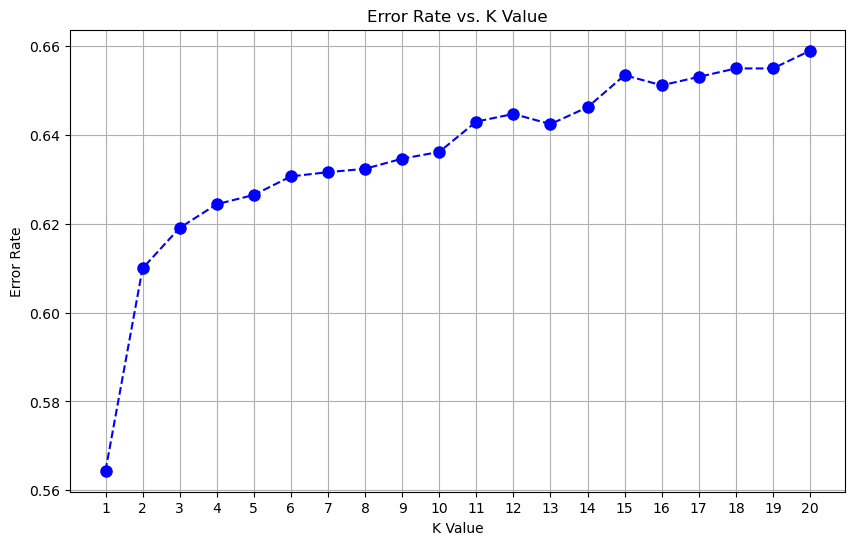

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Define a range of k values to test
k_values = range(1, 21)  # Test k from 1 to 20
error_rates = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    Y_pred = knn.predict(X_test)
    error_rate = 1 - accuracy_score(Y_test, Y_pred)  # Error rate
    error_rates.append(error_rate)

# Plotting the error rates
plt.figure(figsize=(10, 6))
plt.plot(k_values, error_rates, color='blue', marker='o', linestyle='dashed', markersize=8)
plt.title('Error Rate vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Error Rate')
plt.xticks(k_values)
plt.grid()
plt.show()


In [51]:
logencod = OneHotEncoder()

In [52]:
logdf = filtereddf.copy()
logY= logdf["emotion"]
logX= logdf.drop(['emotion','Usage'], axis=1)

In [53]:
logdf

,emotion,Usage,0,1,2,3,4,5,6,7,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
0,0,Training,70,80,82,72,58,58,60,63,...,159,182,183,136,106,116,95,106,109,82
1,0,Training,151,150,147,155,148,133,111,140,...,105,108,95,108,102,67,171,193,183,184
2,2,Training,231,212,156,164,174,138,161,173,...,104,138,152,122,114,101,97,88,110,152
3,4,Training,24,32,36,30,32,23,19,20,...,174,126,132,132,133,136,139,142,143,142
4,6,Training,4,0,0,0,0,0,0,0,...,12,34,31,31,31,27,31,30,29,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35880,2,PrivateTest,164,172,175,171,172,173,178,181,...,217,215,214,216,218,217,222,223,227,231
35881,0,PrivateTest,181,177,176,156,178,144,136,132,...,133,155,156,107,31,53,74,60,28,55
35882,6,PrivateTest,50,36,17,22,23,29,33,39,...,216,215,216,217,221,222,220,223,221,216
35884,0,PrivateTest,17,17,16,23,28,22,19,17,...,190,179,193,193,194,170,148,154,133,113


In [54]:
logY

0        0
1        0
2        2
3        4
4        6
        ..
35880    2
35881    0
35882    6
35884    0
35886    2
Name: emotion, Length: 26351, dtype: int64

In [55]:
logX

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
0,70,80,82,72,58,58,60,63,54,58,...,159,182,183,136,106,116,95,106,109,82
1,151,150,147,155,148,133,111,140,170,174,...,105,108,95,108,102,67,171,193,183,184
2,231,212,156,164,174,138,161,173,182,200,...,104,138,152,122,114,101,97,88,110,152
3,24,32,36,30,32,23,19,20,30,41,...,174,126,132,132,133,136,139,142,143,142
4,4,0,0,0,0,0,0,0,0,0,...,12,34,31,31,31,27,31,30,29,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35880,164,172,175,171,172,173,178,181,188,192,...,217,215,214,216,218,217,222,223,227,231
35881,181,177,176,156,178,144,136,132,122,107,...,133,155,156,107,31,53,74,60,28,55
35882,50,36,17,22,23,29,33,39,34,37,...,216,215,216,217,221,222,220,223,221,216
35884,17,17,16,23,28,22,19,17,25,26,...,190,179,193,193,194,170,148,154,133,113


In [56]:
logY = logencod.fit_transform(logY.values.reshape(-1, 1)).toarray()

In [57]:
logY_labels = logY.argmax(axis=1)

In [58]:
logX_train, logX_test, logY_train, logY_test = train_test_split(logX, logY_labels, test_size=0.2, random_state=0)

In [59]:
log_reg = LogisticRegression(random_state=0)
log_reg.fit(logX_train, logY_train)

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [60]:
logY_pred = log_reg.predict(logX_test)

In [61]:
logaccuracy = accuracy_score(logY_test, logY_pred)
logprecision = precision_score(Y_test, logY_pred, average='weighted')
logrecall = recall_score(logY_test, logY_pred, average='weighted')
print(f"Accuracy: {logaccuracy*100:.2f}%")
print(f"Precision: {logprecision:.2f}")
print(f"Recall: {logrecall:.2f}")

Accuracy: 34.43%
Precision: 0.13
Recall: 0.34


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


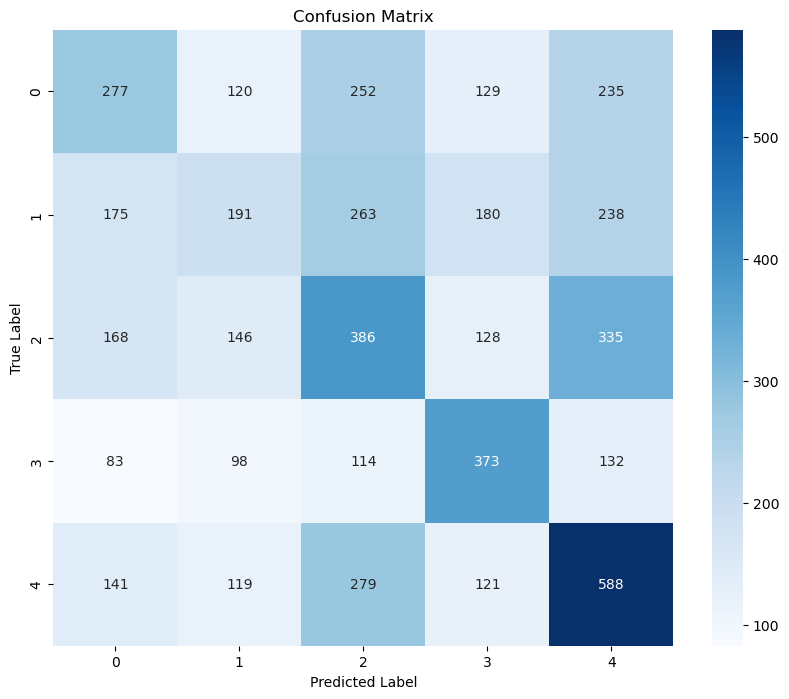

In [62]:
logcm = confusion_matrix(logY_test, logY_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(logcm, annot=True, fmt='d', cmap='Blues', xticklabels=range(5), yticklabels=range(5))
plt.title(f"Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [63]:
# KNN VS LOGISTIC
models = ['KNN', 'Logistic Regression']
accuracies = [accuracy*100, logaccuracy*100]
precisions = [precision, logprecision]
recalls = [recall, logrecall]
models_compare = pd.DataFrame({'Model': models, 'Accuracy': accuracies, 'Precision': precisions, 'Recall': recalls})
models_compare

,Model,Accuracy,Precision,Recall
0,KNN,37.355341,0.376370,0.373553
1,Logistic Regression,34.433694,0.134041,0.344337


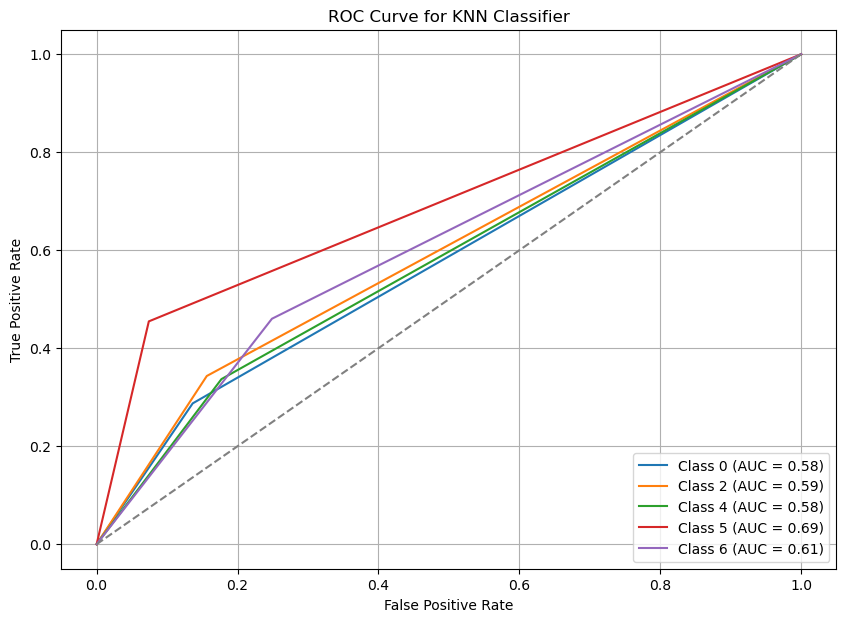

KNN Overall ROC AUC: 0.60


In [64]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize

unique_classes = sorted(filtereddf['emotion'].unique())
Y_test_binarized = label_binarize(Y_test, classes=unique_classes)
knnY_pred_binarized = label_binarize(Y_pred, classes=unique_classes)

plt.figure(figsize=(10, 7))
for i, class_label in enumerate(unique_classes):
    fpr_knn, tpr_knn, _ = roc_curve(Y_test_binarized[:, i], knnY_pred_binarized[:, i])
    auc_knn = auc(fpr_knn, tpr_knn)
    plt.plot(fpr_knn, tpr_knn, label=f'Class {class_label} (AUC = {auc_knn:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('ROC Curve for KNN Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()

knn_roc_auc = roc_auc_score(Y_test_binarized, knnY_pred_binarized, average='weighted')
print(f"KNN Overall ROC AUC: {knn_roc_auc:.2f}")


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


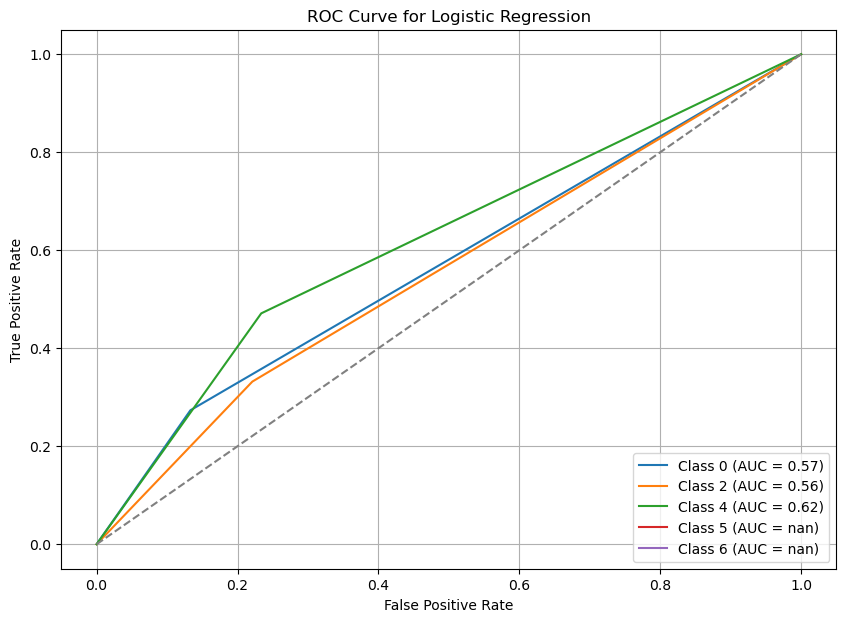

ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.

In [65]:
logY_test_binarized = label_binarize(logY_test, classes=unique_classes)
logY_pred_binarized = label_binarize(logY_pred, classes=unique_classes)

plt.figure(figsize=(10, 7))
for i, class_label in enumerate(unique_classes):
    fpr_log, tpr_log, _ = roc_curve(logY_test_binarized[:, i], logY_pred_binarized[:, i])
    auc_log = auc(fpr_log, tpr_log)
    plt.plot(fpr_log, tpr_log, label=f'Class {class_label} (AUC = {auc_log:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.title('ROC Curve for Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()

log_roc_auc = roc_auc_score(logY_test_binarized, logY_pred_binarized, average='weighted')
print(f"Logistic Regression Overall ROC AUC: {log_roc_auc:.2f}")